## DX 지표: 연도별 수면 데이터량

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 한글 폰트 적용
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

In [12]:
colors_dx = ['#CFF4D2','#7DE493','#55C595','#359D9E','#205072','#205072']

In [3]:
import numpy as np
import pandas as pd

# 랜덤 시드 설정 (재현 가능성을 위해)
np.random.seed(42)

# 연도와 사용자 수 설정
years = [2024, 2025, 2026, 2027, 2028, 2029]
user_amounts = [800, 2176, 7986, 10004, 11046, 9813]

# 빈 데이터프레임 생성
data = pd.DataFrame()

# 더미 데이터 생성
for year, user_amount in zip(years, user_amounts):
    # 사용자 수가 점진적으로 증가하도록 월별 사용자 수 설정
    monthly_user_amounts = np.linspace(start=1, stop=2, num=12)
    monthly_user_amounts = (monthly_user_amounts / monthly_user_amounts.sum()) * user_amount
    monthly_user_amounts = monthly_user_amounts.astype(int)
    monthly_user_amounts[-1] = user_amount - monthly_user_amounts[:-1].sum()  # 합계가 맞도록 마지막 달 조정
    
    for month, monthly_user_amount in enumerate(monthly_user_amounts, start=1):
        # 현재 연도와 월의 데이터프레임 생성
        month_data = pd.DataFrame({
            'Year': [year],
            'Month': [month],
            'Users': [monthly_user_amount]
        })
        # 전체 데이터프레임에 현재 연도와 월의 데이터 추가
        data = pd.concat([data, month_data], ignore_index=True)

# 결과 출력 (데이터프레임의 처음과 끝 일부를 확인)
data.head(12)

,Year,Month,Users
0,2024,1,44
1,2024,2,48
2,2024,3,52
3,2024,4,56
4,2024,5,60
5,2024,6,64
6,2024,7,68
7,2024,8,72
8,2024,9,76
9,2024,10,80


In [4]:
sleep_data = data[['Year','Users']].groupby(by='Year').sum()

<Axes: title={'center': 'DX - 수면 데이터량'}, xlabel='Year'>

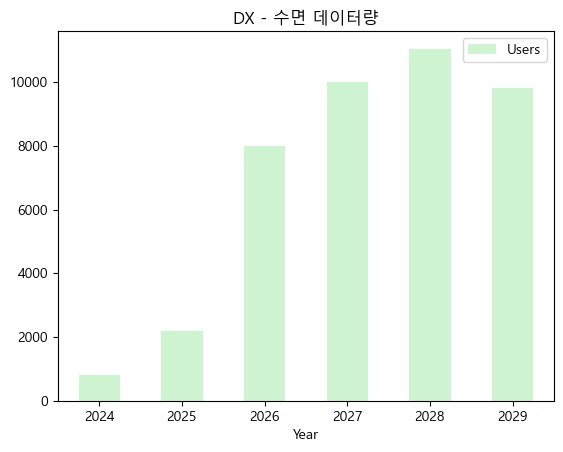

In [13]:
sleep_data.plot(kind='bar',rot=0, color=colors_dx, title = 'DX - 수면 데이터량')